#### 회귀분석

In [1]:
!pip install matplotlib

In [2]:
#엑셀 파일을 파이썬에서 다룰수 있게 해주는 모듈
import pandas as pd

In [3]:
#회귀 분석 가능해주는 모듈
import statsmodels.api as sm

In [4]:
#시각화 가능해주는 라이브러리
import matplotlib.pyplot as plt

In [5]:
#파이썬 내에서 선형대 수학 계산을 가능하게 해주는 모듈
import numpy as np

In [6]:
#vif 계산해주는 모듈
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [7]:
import random

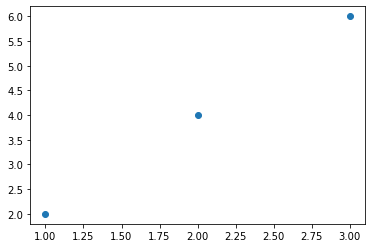

In [8]:
#1. 가상의 데이터 만들기 -x값, y값
x = [1, 2, 3]
y = [2, 4, 6]

#plt: 산점도
plt.scatter(x, y)

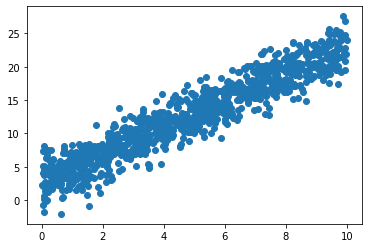

In [9]:
x1 = []
y1 = []

for i in range(1000):
    imsi = random.random() * 10
    x1.append(imsi)
    #                  y절편 + 임의의 난수를 뽑아 넣어줘라 / 표준편차를 1->2로 바꾸어주면 더 넓은? 퍼진? 그래프 추출가능
    y1.append(2 * imsi + 3 + random.gauss(0, 2))
    #y1.append(2 * imsi + random.gauss(3, 2))
plt.scatter(x1, y1)

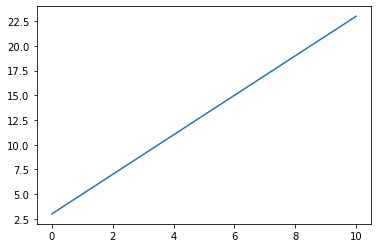

In [10]:
x2 = range(11)
y2 = [2 * n + 3 for n in range(11)]

#직선으로 그리기
plt.plot(x2, y2)

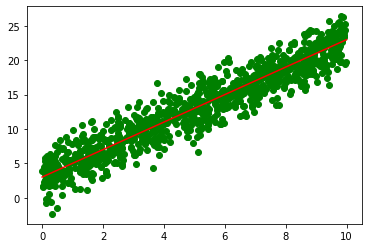

In [30]:
#c: 색깔 지정해줘서 구분해주기
plt.scatter(x1, y1, c = "green")
plt.plot(x2, y2, c = "red")
plt.show()

In [23]:
#회귀분석 돌리기 
#            y절편
X = sm.add_constant(x1)

#             (종속변수, 독립변수)
model = sm.OLS(y1, X)

#주어진 조건으로 회귀모형을 계산한다
result = model.fit()

#그 결과값을 요약해서 보여준다
print(result.summary())

# const: y절편
# std_err: 표준오차
# t값: 1.96보다 크면 좋음
# P값: 0.05보다 작으면 좋음
# [ , ]
# R-squared: 1과 가까우면 조작 의심

# Least Squares: 최소제곱법으로 계산을 했다?

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     8427.
Date:                Mon, 19 Sep 2022   Prob (F-statistic):               0.00
Time:                        17:02:23   Log-Likelihood:                -2111.4
No. Observations:                1000   AIC:                             4227.
Df Residuals:                     998   BIC:                             4237.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.1234      0.123     25.376      0.0

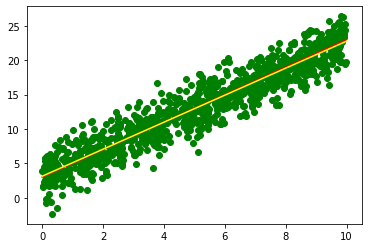

In [46]:
x3 = range(11)
y3 =  [1.9650 * n + 3.1234 for n in x3]

plt.scatter(x1, y1, c = "green")
plt.plot(x2, y2, c = "red")
plt.plot(x3, y3, c = "yellow")
plt.show()

In [47]:
score1 = 0
score2 = 0
for a, i in enumerate(x1):
    score1 += (y1[a] - (2 * i + 3))**2
    score2 += (y1[a] - (1.9650 * i + 3.1234))**2
print(score1/len(x1))
print(score2/len(x1))

#score1의 결과 보다 score2 결과가 낮을수록 좋은 분석결과

4.007921764387154
3.9947916315306076


#### 다중공선성

In [44]:
x4 = []
x4_1 = []
y4 = []
for i in range(100):
    imsi = random.random() * 10
    x4.append(imsi)
    x4_1.append(imsi + random.gauss(0, 1))
    y4.append(2*imsi + random.gauss(3, 2))

df = {"x4" : x4, "x4_1" : x4_1, "y4" : y4}
df = pd.DataFrame(df)

x4 = df[["x4", "x4_1"]] 
# -> x4_1의 결과값이 음수로 나옴 ->원인: x4와 x4_1이 너무 유사해서 다중공선성 이슈가 발생함

#x4지우면 x4_1 결과값이 바르게 나옴?
#x4 = df["x4_1"]
y4 = df["y4"]

x4 = sm.add_constant(x4, has_constant = "add")
model = sm.OLS(y4, x4)
result = model.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                     y4   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     391.9
Date:                Mon, 19 Sep 2022   Prob (F-statistic):           3.42e-47
Time:                        17:32:45   Log-Likelihood:                -219.28
No. Observations:                 100   AIC:                             444.6
Df Residuals:                      97   BIC:                             452.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8193      0.423      6.658      0.0

In [42]:
#상관관계 보는 법1
df.corr()

,x4,x4_1,y4
x4,1.000000,0.949701,0.935991
x4_1,0.949701,1.000000,0.889534
y4,0.935991,0.889534,1.000000


In [41]:
#상관관계 보는 법2
df.corrwith(df["x4"])

x4      1.000000
x4_1    0.949701
y4      0.935991
dtype: float64

In [45]:
#VIF
for i in range(len(model.exog_names)):
    print(model.exog_names[i], variance_inflation_factor(model.exog, i))


const 3.7003443855809666
x4 8.57470739299869
x4_1 8.57470739299869
